# Loading Data and necessary libraries

In [1]:
# Import some puthon libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import train_test_split method and GridSearchCV from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV

# Import our models from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Import metrics methods
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# To load or save our models
import joblib

In [2]:
#Reading using pandas
train_df = pd.read_csv('./dataset/EMNIST/emnist-balanced-train.csv', header=None)
test_df = pd.read_csv('./dataset/EMNIST/emnist-balanced-test.csv', header=None)

# Add test dataset into train dataset
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()

# Clear memory
del train_df
del test_df

In [3]:
#Reading the file
label_map = pd.read_csv("./dataset/EMNIST/emnist-balanced-mapping.txt",
                        delimiter = ' ',
                        index_col=0,
                        header=None)
label_map = label_map.iloc[:, 0]

#Initialising an empty dictionary
label_dictionary = {}

#Running a loop for ASCII equivalent to character conversion
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [4]:
df.shape

(131600, 785)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,131600.000000,131600.0,131600.0,131600.0,131600.0,131600.000000,131600.000000,131600.000000,131600.000000,131600.000000,...,131600.000000,131600.0,131600.0,131600.000000,131600.000000,131600.0,131600.0,131600.0,131600.0,131600.0
mean,23.000000,0.0,0.0,0.0,0.0,0.002036,0.012728,0.019354,0.016284,0.017447,...,0.000266,0.0,0.0,0.001854,0.000243,0.0,0.0,0.0,0.0,0.0
std,13.564712,0.0,0.0,0.0,0.0,0.295477,1.312534,1.586618,1.521459,1.692130,...,0.096481,0.0,0.0,0.672608,0.088211,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


# Preprocessing data

In [6]:
# Is there any missing values
df.dropna(inplace=True)
num_missing_values = df.isnull().sum().sum()

# Remove duplicates if any
df.drop_duplicates(inplace=True)
num_duplicates = df.duplicated().sum()

# Make sure the grayscale values to be between 0 and 255
df = np.clip(df, 0, 255)
num_values_outside_range = ((df < 0) | (df > 255)).sum().sum()

# Check if we have any null values or duplicated rows or values outside (0, 255) range.
print(f"Any missing value? {num_missing_values}")
print(f"Any duplicates? {num_duplicates}")
print(f"Any values outside the range of 0 and 255? {num_values_outside_range}")

Any missing value? 0
Any duplicates? 0
Any values outside the range of 0 and 255? 0


In [8]:
# We split our dataframe into feature matrix (X) and target vector (y)
X = df.loc[:, 1:]
y = df.loc[:, 0]

X.shape, y.shape

del df

In [13]:
# Sample entry number 42
sample_image = X.iloc[42]
sample_label = y.iloc[42]
sample_image.shape, sample_label

((784,), 23)

Label entry No. 42: N


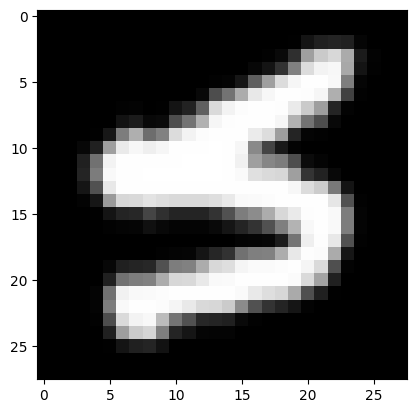

In [14]:
print("Label entry No. 42:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

In [15]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

Label entry 42: N


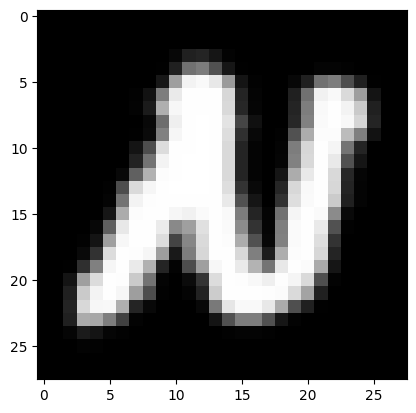

In [16]:
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(flip_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

In [17]:
# Next we want to apply reshape_and_rotate to all images in X_train
X = np.asarray(X)
X = np.apply_along_axis(flip_and_rotate, 1, X)
X.shape

(131598, 28, 28)

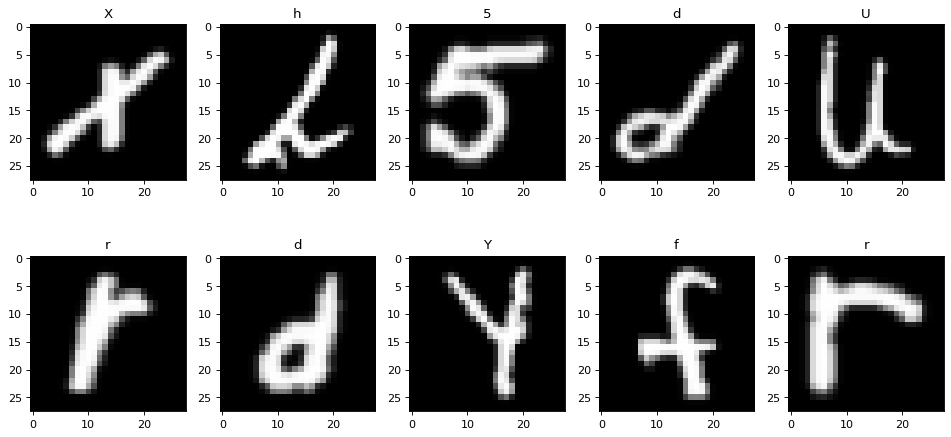

In [18]:
plt.figure(figsize=(12, 6), dpi=80)  # Adjust the figure size to accommodate two rows
for i in range(100, 110):  # Update the range to select 10 samples
    plt.subplot(2, 5, i - 99)  # Use 2 rows and 5 columns for displaying the samples
    plt.imshow(X[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y[i]])
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [19]:
# Flatten the images
X = X.reshape(X.shape[0], -1)
X.shape

(131598, 784)

# Split data

In [20]:
# Split 20% validation 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size= 0.2,
                                                  stratify = y,
                                                  random_state=88)

print(X_train.shape)
print(X_test.shape)

(105278, 784)
(26320, 784)


# Build Machine learning Models

## 1) Random Forest

In [24]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model on your training set
rf_model.fit(X_train, y_train)

# Predict the labels of your validation set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate precision, recall, and f1 score
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Accuracy: 0.8118541033434651
Precision: 0.8119493522475134
Recall: 0.8118541033434651
F1 Score: 0.8098937096654448


## 2) KNN

In [21]:
# Create a KNN classifier with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on your training set
knn_model.fit(X_train, y_train)

# Predict the labels of your validation set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate precision, recall, and f1 score
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.78290273556231
Precision: 0.7931620867778456
Recall: 0.78290273556231
F1 Score: 0.7822322350312396


## 3) Naive-bayes

In [22]:
# Create a KNN classifier with k=5
nb_model = GaussianNB()

# Train the model on your training set
nb_model.fit(X_train, y_train)

# Predict the labels of your validation set
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate precision, recall, and f1 score
precision_nb, recall_nb, f1_nb, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

Accuracy: 0.2762917933130699
Precision: 0.42236357411110537
Recall: 0.2762917933130699
F1 Score: 0.24116615965406896


## 4) SVM

In [23]:
# Create an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model on your training set
svm_model.fit(X_train, y_train)

# Predict the labels of your validation set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate precision, recall, and f1 score
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Accuracy: 0.8436930091185411
Precision: 0.8449859853316789
Recall: 0.8436930091185411
F1 Score: 0.8419189462167611


# Save models

In [25]:
joblib.dump(rf_model, './saved/random_forest.pkl')
joblib.dump(knn_model, './saved/knn.pkl')
joblib.dump(nb_model, './saved/naive_bayes.pkl')
joblib.dump(svm_model, './saved/svm.pkl')

['./saved/svm.pkl']

# Additional Steps..

## 1) Cross-validation

In [ ]:
#Let's perform cross-validation
from sklearn.model_selection import cross_val_score, KFold

models = [('Random-Forest', rf_model), ('KNN', knn_model), ('Naive-Bayes', nb_model), ('SVM', svm_model)]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for key, value in models:
    scores = cross_val_score(value, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"{key} score : ", scores.mean())

Random-Forest score :  0.8067022819450289
KNN score :  0.7757936227235227
Naive-Bayes score :  0.2774179305141621


## 2) Grid searchCV

### 2.1) Random Forest

In [20]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding accuracy
best_rf_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# Evaluate the best model on the validation data
validation_accuracy = best_rf_model.score(X_test, y_test)

# Print the results
print("Best Model:", best_rf_model)
print("Best Parameters:", best_parameters)
print("Best Accuracy:", best_accuracy)
print("Validation Accuracy:", validation_accuracy)

Best Model: RandomForestClassifier(n_estimators=150, random_state=42)
Best Accuracy: 0.8078826170512944
Validation Accuracy: 0.8159574468085107


### 2.2) KNN

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding accuracy
best_knn_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

# Evaluate the best model on the validation data
validation_accuracy = best_knn_model.score(X_test, y_test)

# Print the results
print("Best Model:", best_knn_model)
print("Best Accuracy:", best_accuracy)
print("Validation Accuracy:", validation_accuracy)

### 2.3) SVM

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}


# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding accuracy
best_knn_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

# Evaluate the best model on the validation data
validation_accuracy = best_knn_model.score(X_test, y_test)

# Print the results
print("Best Model:", best_knn_model)
print("Best Accuracy:", best_accuracy)
print("Validation Accuracy:", validation_accuracy)